In [ ]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import json
import tqdm
ROOT_PATH = "/content/drive/MyDrive/DSCI 560/Datasets/"

In [2]:
def get_filtered_columns(data, key_names):
  filtered_data = []
  for record in data:
    row = {}
    for key in key_names:
      r = record
      for key_comp in key.split('.')[:-1]:
        r = r.get(key_comp, {})
      row[key] = r.get(key.split('.')[-1], None)
    filtered_data.append(row)
  return filtered_data

In [112]:
business_json = json.load(open(f"{ROOT_PATH}/business.json"))
print(len(business_json))
key_names = ['business_name', 'street_address', 'city', 'zip_code', 
             'location_start_date', 'location_end_date', 'location_description']
business_df = pd.DataFrame(get_filtered_columns(business_json, key_names))
business_df.loc[business_df.location_end_date.isna(), 'location_end_date'] = pd.to_datetime('01-01-2024')
business_df.location_end_date = pd.to_datetime(business_df.location_end_date, errors='coerce')
business_df = business_df.dropna()
business_df.location_start_date = pd.to_datetime(business_df.location_start_date, errors='coerce')
del business_json

1508036


In [173]:
housing_json = json.load(open(f"{ROOT_PATH}/housing.json"))
print(len(housing_json))
key_names = ['issue_date', 'street_name', 'work_description', 'zip_code', 'valuation',
             'of_residential_dwelling_units', 
             'floor_area_l_a_zoning_code_definition', 
             'of_stories', 'census_tract', 'floor_area_l_a_building_code_definition',
             ]
housing_df = pd.DataFrame(get_filtered_columns(housing_json, key_names)).dropna()
housing_df.issue_date = pd.to_datetime(housing_df.issue_date, errors='coerce')
del housing_json

25013


In [174]:
housing_df['city'] = housing_df.apply(lambda x: zc2.get(x.zip_code), axis=1)

In [175]:
housing_df['city']

0        Playa Vista
1        LOS ANGELES
2        NORTH HILLS
3        LOS ANGELES
4        NORTH HILLS
            ...     
25008    Playa Vista
25009    Los Angeles
25010    Los Angeles
25011    LOS ANGELES
25012    LOS ANGELES
Name: city, Length: 24533, dtype: object

In [144]:
zc2 = {}
for key in zip_city:
  zc2[key.split("-")[0]] = zip_city[key]

0

In [127]:
business_df_date = business_df[business_df.location_end_date >= housing_df.issue_date.min()]

In [85]:
housing_df.shape

(24533, 10)

In [128]:
business_df_date.city = business_df_date.city.str.lower()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [129]:
city_business = business_df_date.groupby("city").count()['business_name'].reset_index().sort_values("business_name", ascending= False)[:10]

In [116]:
date_business = business_df_date.groupby(business_df_date.location_end_date.dt.year).count()['business_name'].reset_index().sort_values("business_name", ascending= False)

In [117]:
sdate_business = business_df_date.groupby(business_df_date.location_start_date.dt.year).count()['business_name'].reset_index().sort_values("business_name", ascending= False)

In [122]:
business_year = date_business.merge(right=sdate_business, how='outer', left_on='location_end_date', right_on='location_start_date').fillna(0)
business_year = business_year.sort_values(by='location_end_date')[-13:-2]
business_year['num'] = (business_year['business_name_y'] - business_year['business_name_x'])
business_year

,location_end_date,business_name_x,location_start_date,business_name_y,num
1,2013.0,45372.0,2013.0,52203.0,6831.0
4,2014.0,36064.0,2014.0,55733.0,19669.0
2,2015.0,40642.0,2015.0,60025.0,19383.0
5,2016.0,35703.0,2016.0,52198.0,16495.0
6,2017.0,34697.0,2017.0,49751.0,15054.0
3,2018.0,36158.0,2018.0,52654.0,16496.0
7,2019.0,34538.0,2019.0,42580.0,8042.0
8,2020.0,30593.0,2020.0,35874.0,5281.0
9,2021.0,16269.0,2021.0,34140.0,17871.0
10,2022.0,5218.0,2022.0,27135.0,21917.0


In [178]:
housing_df['valuation'] = housing_df['valuation'].astype(float)

In [179]:
housing_df.groupby("city").mean()

,valuation
city,
beverly hills,1.423881e+06
burbank,7.858750e+04
canoga park,8.717620e+05
chatsworth,1.045358e+06
culver city,2.757087e+06
encino,8.871039e+05
gardena,9.335559e+05
glendale,2.000000e+05
granada hills,6.959091e+05


In [180]:
housing_df['city'] = housing_df.city.str.lower()
city_housing_price = housing_df.groupby("city").mean()['valuation'].reset_index().sort_values("valuation", ascending= False)[:10]
date_housing_price = housing_df.groupby(housing_df.issue_date.dt.year).mean()['valuation'].reset_index().sort_values("valuation", ascending = False)[:10]

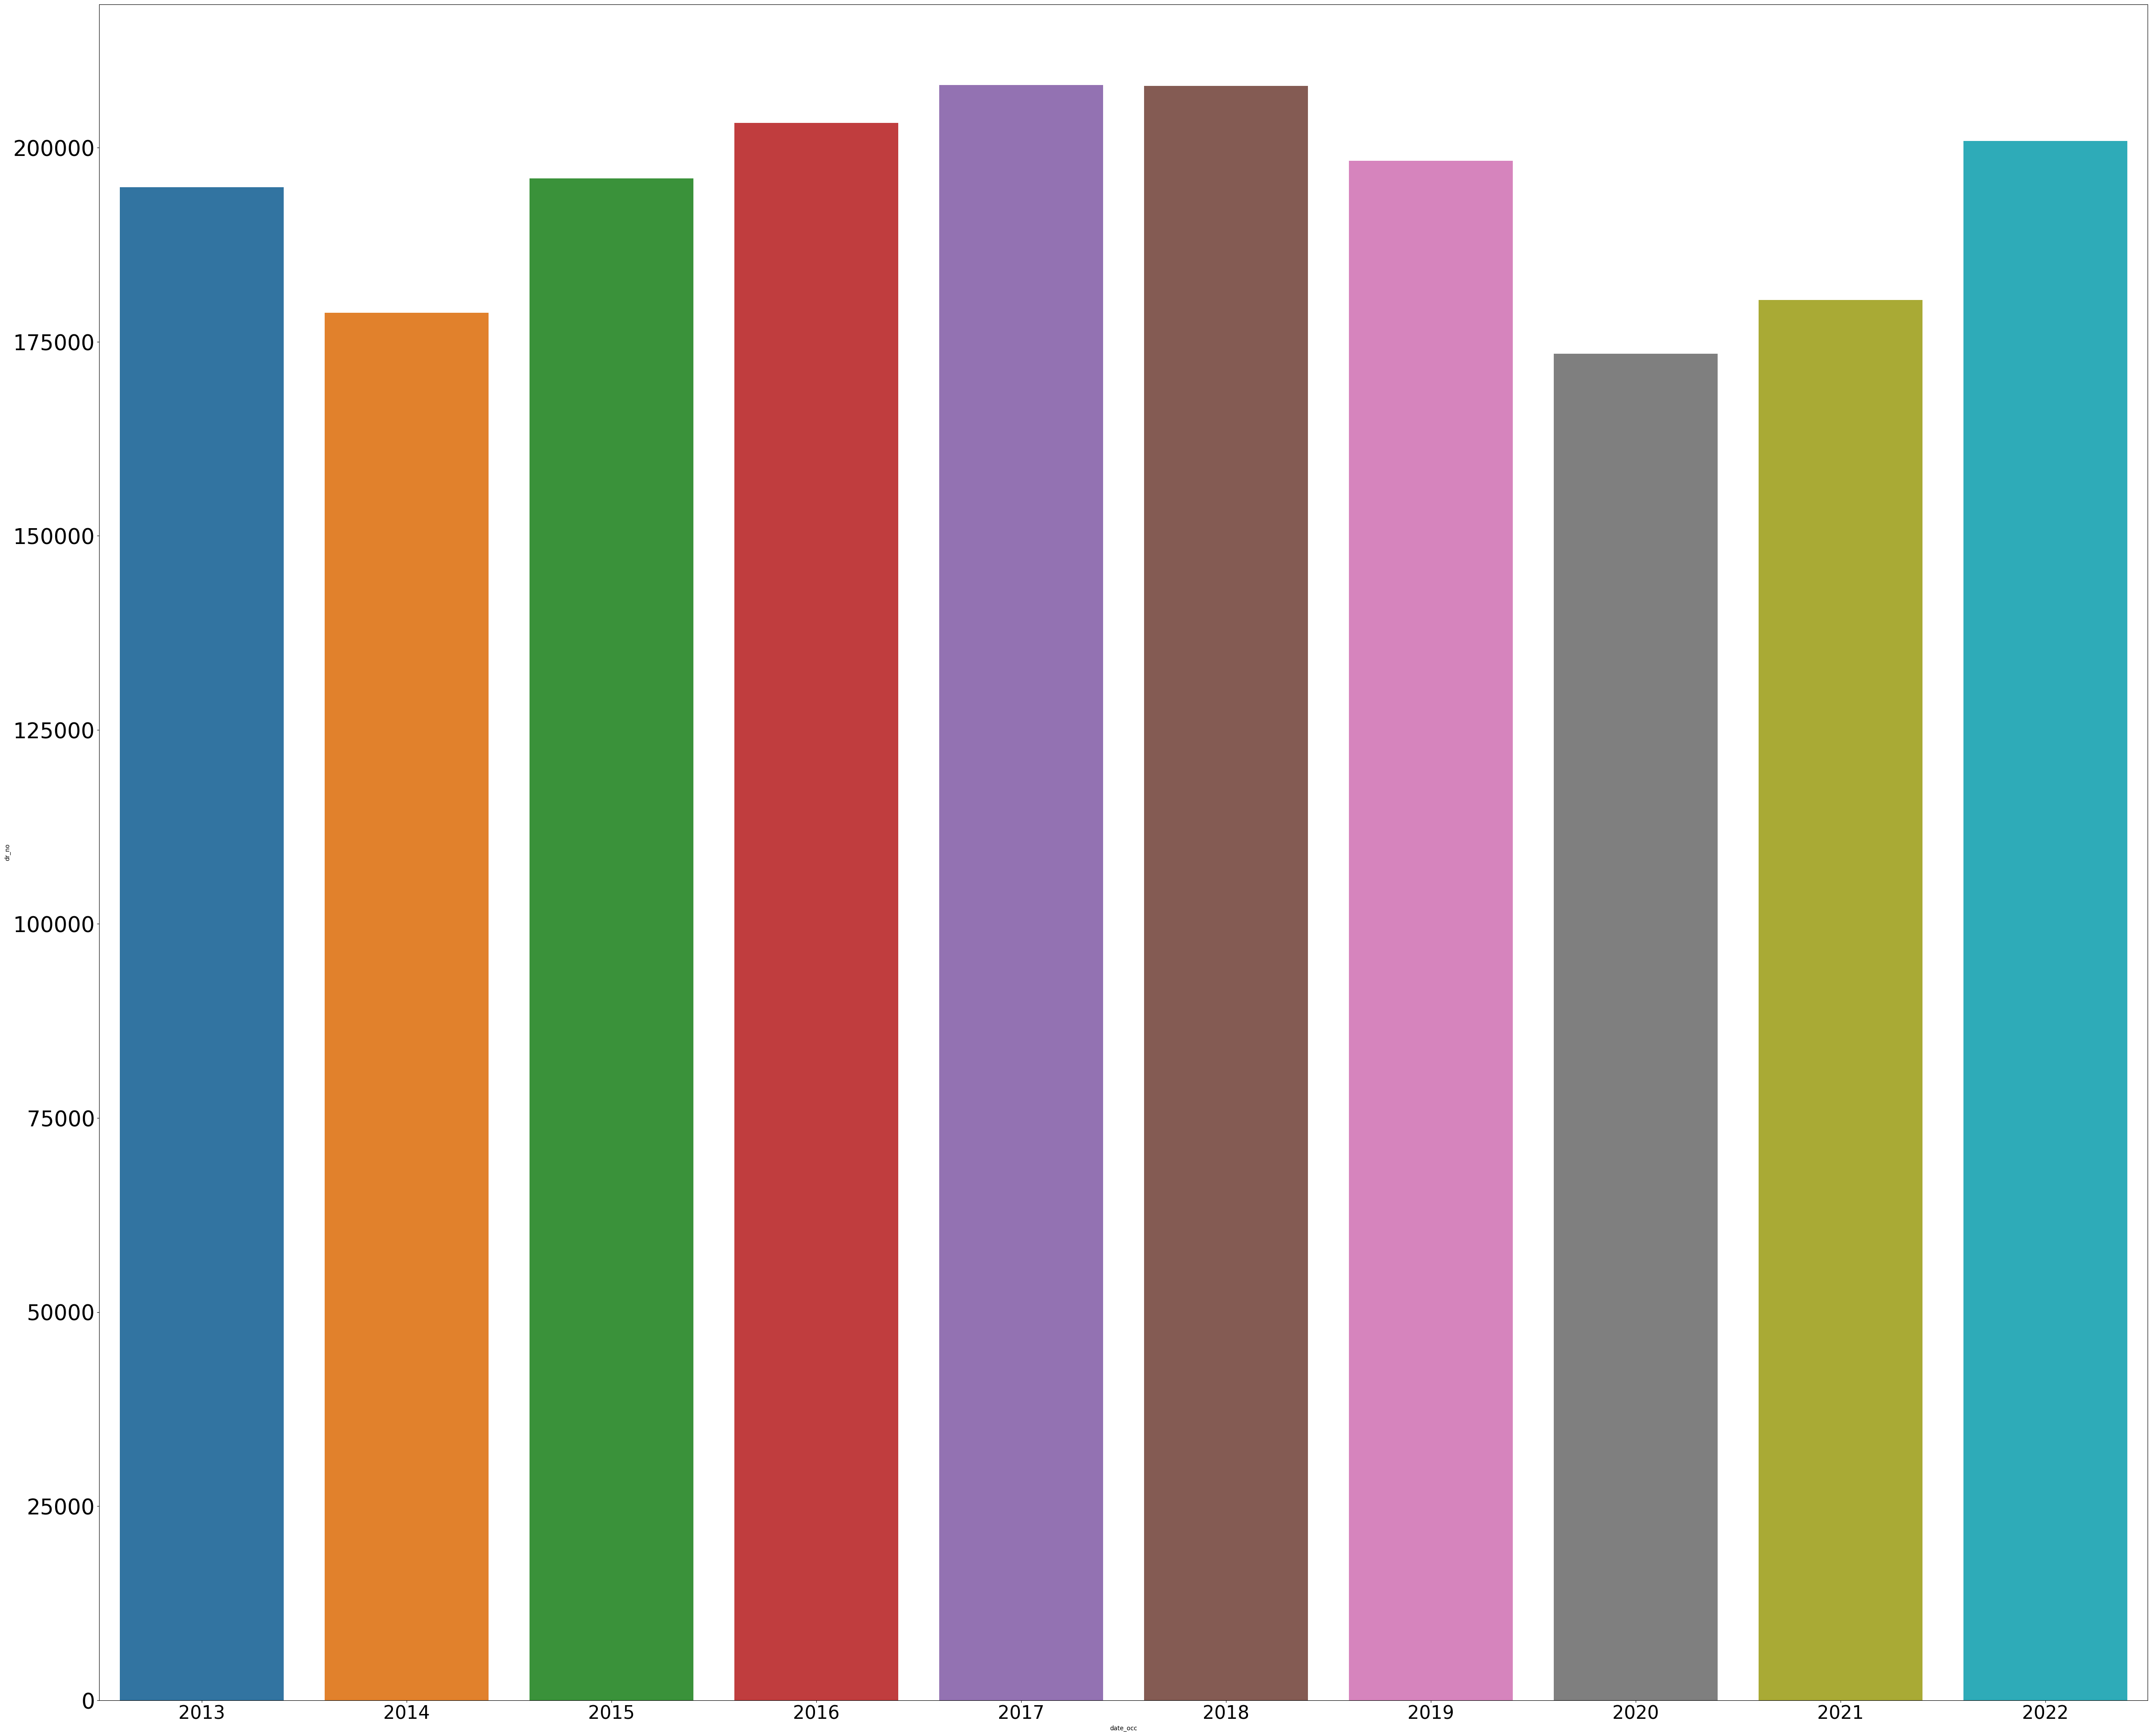

In [242]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.figure(figsize=(60, 50))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=35) 
sns.barplot(data=crime_date, x = 'date_occ', y = 'dr_no')

In [40]:
city_business.city = city_business.city.astype("category")

In [49]:
city_business.dtypes

city             category
business_name       int64
dtype: object

In [86]:
crime1_json = json.load(open(f"{ROOT_PATH}/crime10_19.json"))
print(len(crime1_json))
key_names = list(crime1_json[0].keys())
key_names = ['dr_no', 'date_rptd', 'date_occ', 'area', 'area_name', 'rpt_dist_no',
            'crm_cd', 'crm_cd_desc', 'vict_age', 'vict_sex', 'vict_descent', 'vict_descent', 'location', 'lat', 'lon']
crime_df = pd.DataFrame(crime1_json, columns=key_names)
crime_df.date_rptd = pd.to_datetime(crime_df.date_rptd, errors='coerce')
crime_df.date_occ = pd.to_datetime(crime_df.date_occ, errors='coerce')
crime_df = crime_df.dropna()
del crime1_json

2119797


In [235]:
crime2_json = json.load(open(f"{ROOT_PATH}/crime20_23.json"))
print(len(crime2_json))
key_names = ['dr_no', 'date_rptd', 'date_occ', 'area', 'area_name', 'rpt_dist_no',
            'crm_cd', 'crm_cd_desc', 'vict_age', 'vict_sex', 'vict_descent', 'vict_descent', 'location', 'lat', 'lon']
crime2_df = pd.DataFrame(crime2_json, columns=key_names)
crime2_df.date_rptd = pd.to_datetime(crime2_df.date_rptd, errors='coerce')
crime2_df.date_occ = pd.to_datetime(crime2_df.date_occ, errors='coerce')
crime2_df = crime2_df.dropna()
crime_df = crime_df.append(crime2_df)
del crime2_df
del crime2_json

638245


In [237]:
crime_df.date_occ.max()

Timestamp('2022-12-31 00:00:00')

In [ ]:
from uszipcode import SearchEngine
sr = SearchEngine()

def get_zipcode(lat, long):
  record = sr.by_coordinates(float(lat), float(long), returns=1, radius=5)
  if len(record) > 0:
    return record[0].zipcode
  else:
    return None
crime_df.zip_code = crime_df.apply(lambda x: get_zipcode(float(x.lat), float(x.lon)), axis=1)

<ipython-input-37-ce16e150fda7>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  crime_df.zip_code = crime_df.apply(lambda x: get_zipcode(float(x.lat), float(x.lon)), axis=1)


In [238]:
crime_df_date = crime_df[crime_df.date_occ >= housing_df.issue_date.min()]

In [240]:
len(crime_df_date)

1941942

In [185]:
crime_df_date.head()

,dr_no,date_rptd,date_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,vict_descent,location,lat,lon
114613,130814829,2013-09-30,2013-09-27,08,West LA,0838,310,BURGLARY,26,M,W,W,1000 GAYLEY AV,34.062,-118.448
410108,131906991,2013-02-21,2013-02-20,19,Mission,1972,310,BURGLARY,52,M,W,W,9000 LEMONA AV,34.2336,-118.4592
410359,130911659,2013-06-04,2013-06-04,09,Van Nuys,0952,310,BURGLARY,58,M,H,H,5400 HALBRENT AV,34.1685,-118.4648
410528,140107110,2014-02-15,2013-12-31,01,Central,0192,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",21,F,B,B,HOPE,34.0363,-118.2672
411029,131718232,2013-11-05,2013-11-04,17,Devonshire,1795,933,PROWLER,54,F,W,W,17200 ROSCOE BL,34.2212,-118.5078


In [198]:
crime_type = crime_df_date.groupby('crm_cd_desc').count()['dr_no'].reset_index().sort_values('dr_no', ascending=False)
crime_type['cum_sum'] = crime_type['dr_no'].cumsum()

In [199]:
crime_type

,crm_cd_desc,dr_no,cum_sum
5,BATTERY - SIMPLE ASSAULT,130191,130191
22,BURGLARY FROM VEHICLE,112609,242800
118,THEFT PLAIN - PETTY ($950 & UNDER),107928,350728
21,BURGLARY,100537,451265
116,THEFT OF IDENTITY,87260,538525
...,...,...,...
13,BLOCKING DOOR INDUCTION CENTER,3,1366318
126,TILL TAP - ATTEMPT,2,1366320
129,TRAIN WRECKING,2,1366322
63,FIREARMS RESTRAINING ORDER (FIREARMS RO),2,1366324


In [215]:
crime_type_pareto = crime_type[crime_type.cum_sum <= 1366325 * 0.8]
crime_type_pareto = crime_type_pareto.append({ 'crm_cd_desc': 'OTHER', 'dr_no': 1366325 * 0.05, 'cum_sum': 1366325 }, ignore_index=True)

In [216]:
crime_type_pareto

,crm_cd_desc,dr_no,cum_sum
0,BATTERY - SIMPLE ASSAULT,130191.00,130191
1,BURGLARY FROM VEHICLE,112609.00,242800
2,THEFT PLAIN - PETTY ($950 & UNDER),107928.00,350728
3,BURGLARY,100537.00,451265
4,THEFT OF IDENTITY,87260.00,538525
5,INTIMATE PARTNER - SIMPLE ASSAULT,83791.00,622316
6,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",81565.00,703881
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",68840.00,772721
8,VANDALISM - MISDEAMEANOR ($399 OR UNDER),60310.00,833031
9,ROBBERY,57630.00,890661


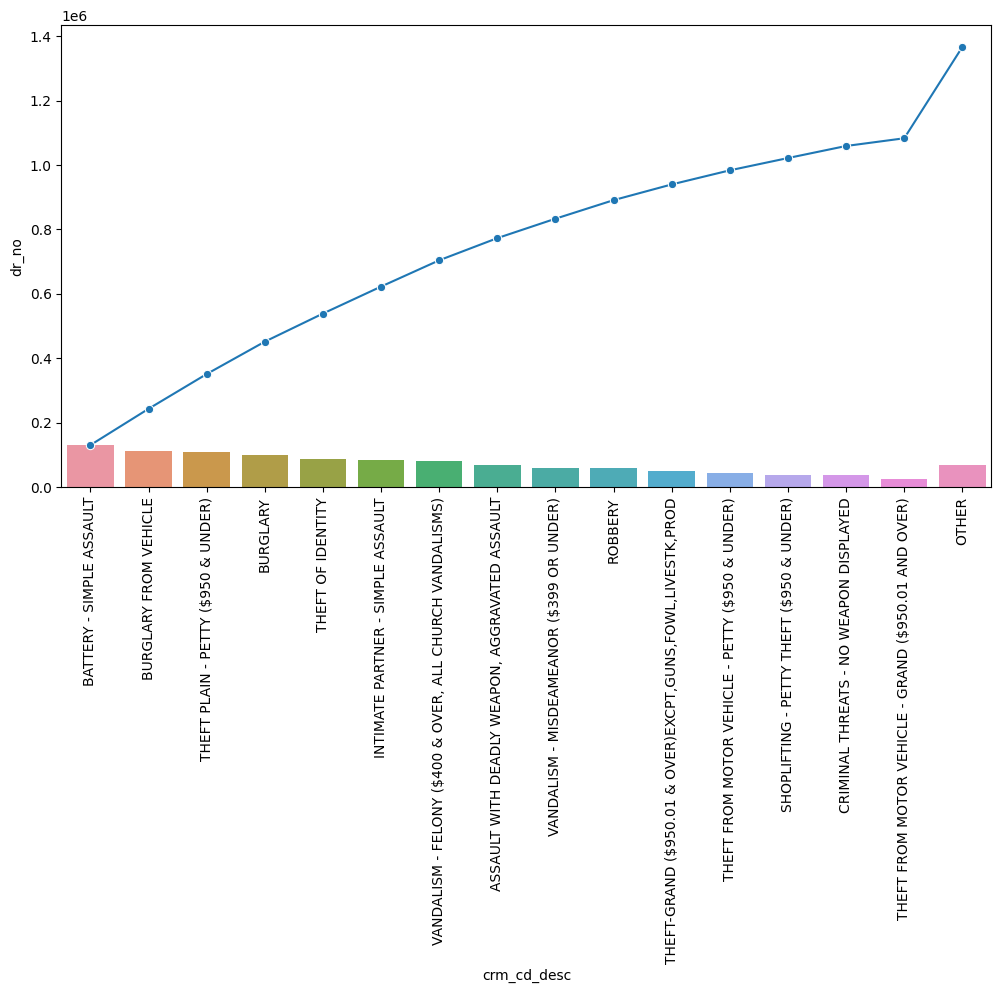

In [217]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90)

sns.lineplot(data = crime_type_pareto['cum_sum'], marker='o', ax=ax1)
sns.barplot(data = crime_type_pareto, x='crm_cd_desc', y='dr_no', ax=ax1)

In [241]:
crime_date = crime_df_date.groupby(crime_df_date.date_occ.dt.year).count()['dr_no'].reset_index().sort_values('dr_no', ascending=False)[:10]